# SCC-ICMC-USP 


# CURSO 2 - CD-AM-DM
# Exercício de fixação 
# Profa. Roseli A. F. Romero

---

### Objetivos:
- Praticar a utilização de Métodos de Aprendizado de Máquina 
- SVMs, NB, KNN
- Comparar métodos diferentes
- Curvas ROC

---

### Questão 1.

Carregue o dataset Spambase e faça uma breve exploração dos dados

In [ ]:
import pandas as pd

dataset = pd.read_csv("spambase.csv")
dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

**Esperavamos que todos os atributos fossem numéricos. O método `info()` nos diz que todos os atributos são numéricos, então o dataset foi carregado corretamente**

### Questão 2- Verificar se existem dados faltantes.

In [ ]:
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**Não há dados faltantes**

### Questão 3 - Verificar a distribuição das classes.

Contagem das classes:
Classe 0 (não spam): 2788/4601 (60.60%)
Classe 1 (spam):1813/4601 (39.40%)


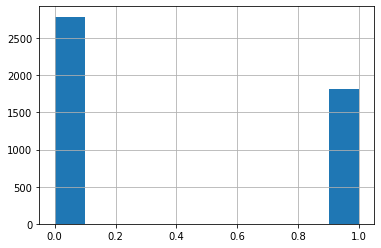

In [ ]:
dataset["is_spam"].hist()
print("Contagem das classes:")
contagem_classes = dataset["is_spam"].value_counts()
total = dataset.shape[0]
print("Classe 0 (não spam): %d/%d (%.2f%%)" % (contagem_classes[0], total, (contagem_classes[0]/total)*100))
print("Classe 1 (spam):%d/%d (%.2f%%)" % (contagem_classes[1],total, (contagem_classes[1]/total)*100))

**Não há um desbalanceamento severo**

### Questão 04.

Prepare os dados dividindo-os em atributos e classes.

In [ ]:
X = dataset.drop(['is_spam'], axis=1).values
y = dataset['is_spam'].values
print(X.shape)
print(y.shape)

(4601, 57)
(4601,)


### Questão 05.

Gere ao menos 5 parametrizações do algoritmo SVM. Para armazenar essas parametrizações, utilize uma estrutura do tipo dicionário, armazenando um identificador da parametrização como chave e o modelo SVM como valor. Um exemplo para o modelo do KNN pode ser visto abaixo. Avalie essas parametrizações utilizando a função `avaliar_modelos` definida na célula abaixo.

- Exemplo de parametrizações do knn:
```
parametrizacoes_knn = {
    "K = 2": KNeighborsClassifier(n_neighbors=2),
    "K = 5": KNeighborsClassifier(n_neighbors=5),
    "K = 7": KNeighborsClassifier(n_neighbors=7)
}
```

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

resultados = {    
    "Parametrização" :[],
    "Acuracia" :[],
    "Recall" :[],
    "Roc_auc" :[]
}


def avaliar_modelos(parametrizacoes, X, y, resultados):
    """Avalia modelos utilizando 10-fold cross-validation

    Essa função recebe um conjunto de parametrizações, um conjunto de 
    atributos e labels e cria uma estrutura de resultados.    
    """

    # Vamos iterar sobre cada parametrização no dicionário.
    # Ao adicionar .items(), vamos iterar sobre todos os pares
    # (chave, valor) do dicionário:
    for nome, modelo in parametrizacoes.items():
        print("Avaliando parametrização:", nome)
        print("\tProgresso: [", end = '')
        # Vamos padronizar nossos dados com o StandardScaler
        scaler = StandardScaler()
        # StratifiedKFold irá separar nossos dados em K splits estratificados,
        # ou seja, K splits onde a distribuição das classes será igual ao dos
        # dados originais. Shuffle irá embaralhar nossos dados antes de efetuar
        # o split.
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        # As 3 listas a seguir irão armazenar as métricas de acurácia, recall e
        # área sob a curva ROC de cada fold. Usaremos essas listas para calcular
        # a média de cada métrica.
        accs_scores = []
        recall_scores = []        
        roc_aucs_scores = []
        # O método split irá retornar índices que nós usaremos pra indexar os
        # conjuntos X e y. Por exemplo, se tivermos 10 exemplos no nosso conjunto
        # de dados e quisermos realizar 5 splits, uma possível divisão de splits
        # seria [1, 2], [0, 3], [4, 9], [5, 8], [6, 7]. Então para cada iteração
        # do for, o método split separa 1 desses splits para treino e o resto 
        # para teste (ex. teste = [1, 2], treino = [0, 3, 4, 9, 5, 8, 6, 7]). O 
        # loop for acaba depois que todos os splits forem usados para teste.        
        for treino, teste in cv.split(X, y):            
            # Fit apenas no conjunto de treino:
            scaler.fit(X[treino])
            # Vamos escalar tanto os dados de treino quanto de teste.
            X_treino_escalado = scaler.transform(X[treino])
            X_teste_escalado = scaler.transform(X[teste])
            # Fit do modelo nos dados de treino:
            modelo.fit(X_treino_escalado, y[treino])
            # Calculo das métricas do fold. Armazenamos elas nas listas que
            # definimos anteriormente.
            y_pred = modelo.predict(X_teste_escalado)                    
            accs_scores.append(accuracy_score(y[teste], y_pred))
            recall_scores.append(recall_score(y[teste], y_pred))
            # y_score calculado como especificado em:
            # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
            y_score = modelo.predict_proba(X_teste_escalado)[:, 1]
            roc_aucs_scores.append(roc_auc_score(y[teste], y_score))
            # Barra de progresso             
            print("#", end = '')
        print("]")
        # Adicionando média dos folds aos resultados:        
        resultados["Parametrização"].append(nome)
        resultados["Acuracia"].append(np.mean(accs_scores))
        resultados["Recall"].append(np.mean(recall_scores))
        resultados["Roc_auc"].append(np.mean(roc_aucs_scores))

### Questão 6. Criar as parametrizações propriamente ditas para o método SVC.

In [ ]:
from sklearn.svm import SVC
# criando as diferentes parametrizações para o método SVC
modelos_svm = {
    "Kernel rbf, gamma auto": SVC(kernel = 'rbf', gamma='auto', probability=True),
    "Kernel linear": SVC(kernel = 'linear', probability=True),
    "Kernel sigmoide": SVC(kernel = 'sigmoid', probability=True),
    "Kernel polinomial grau 2": SVC(kernel = 'poly', degree=2, probability=True),
    "Kernel polinomial grau 3": SVC(kernel = 'poly', degree=3, probability=True)
}

avaliar_modelos(modelos_svm, X, y, resultados)

Avaliando parametrização: Kernel rbf, gamma auto
[##########]
Avaliando parametrização: Kernel linear
[##########]
Avaliando parametrização: Kernel sigmoide
[##########]
Avaliando parametrização: Kernel polinomial grau 2
[##########]
Avaliando parametrização: Kernel polinomial grau 3
[##########]


### Questão 7 - Vamos gerar um dataframe com o dicionário de resultados para podermos manipulá-lo mais fácilmente:

In [ ]:
# resultados
resultados_df = pd.DataFrame.from_dict(resultados)
resultados_df

,Parametrização,Acuracia,Recall,Roc_auc
0,"Kernel rbf, gamma auto",0.934146,0.896287,0.975088
1,Kernel linear,0.928062,0.892438,0.971802
2,Kernel sigmoide,0.880247,0.836170,0.926166
3,Kernel polinomial grau 2,0.848735,0.658615,0.954409
4,Kernel polinomial grau 3,0.784616,0.482123,0.957036


### Questão 8 - Determine a melhor parametrização, baseando-se na métrica Roc AUC, e recupere o modelo associado a ela. 
- Queremos achar a parametrização que gerou maior roc auc entre as parametrizações testadas:

In [ ]:
max_roc_auc = resultados_df["Roc_auc"].max()
# Usamos o iloc para pegar apenas o primeiro resultado
melhor_parametrizacao = resultados_df.query("Roc_auc == @max_roc_auc").iloc[0]
melhor_parametrizacao

Parametrização    Kernel rbf, gamma auto
Acuracia                        0.934146
Recall                          0.896287
Roc_auc                         0.975088
Name: 0, dtype: object

### Questão 9 - Repetir a questão 8 mas fazendo isso diretamente com o método `idxmax()`:

In [ ]:
melhor_parametrizacao = resultados_df.loc[resultados_df["Roc_auc"].idxmax()]
melhor_parametrizacao

Parametrização    Kernel rbf, gamma auto
Acuracia                        0.934146
Recall                          0.896287
Roc_auc                         0.975088
Name: 0, dtype: object

### Questão 10 - Agora vamos recuperar o modelo com a melhor parametrização:

In [ ]:
# Acessando o valor da parametrização como string:
nome_parametrizacao = melhor_parametrizacao["Parametrização"]
print(nome_parametrizacao)
melhor_modelo_svm = modelos_svm[nome_parametrizacao]
type(melhor_modelo_svm)

Kernel rbf, gamma auto


sklearn.svm._classes.SVC

### Questão 11.
Calcule a curva roc para a melhor parametrização encontrada, utilizando 10-fold cross-validation. Plote-as no mesmo gráfico. Para isso, utilize a função `plot_kfold_roc_curves` abaixo

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

def plot_kfold_roc_curves(model, X, y, k=10):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)    
    fig = plt.figure(figsize=(15,10))    
    ax = fig.gca()
    
    # Plota as curvas ROC de cada fold:
    print("\tProgresso: [", end = '')
    for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        viz = plot_roc_curve(model, X[test], y[test],
                            name='ROC fold {}'.format(i),
                            alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)  
        print("#", end = '')
    print("]")

    # Plota a curva ROC média dos folds:
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'ROC Médio (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)
    
    # Plota uma região de +- 1 desvio padrão da média
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
            label=r'$\pm$ 1 desvio padrão')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title="Curva ROC para o classificador com %d-fold cross-validation" % (k))
    ax.legend(loc="lower right")
    plt.xlabel('Taxa Falsos Positivos')
    plt.ylabel('Taxa Verdadeiros Positivos')
    

Progresso: [##########]


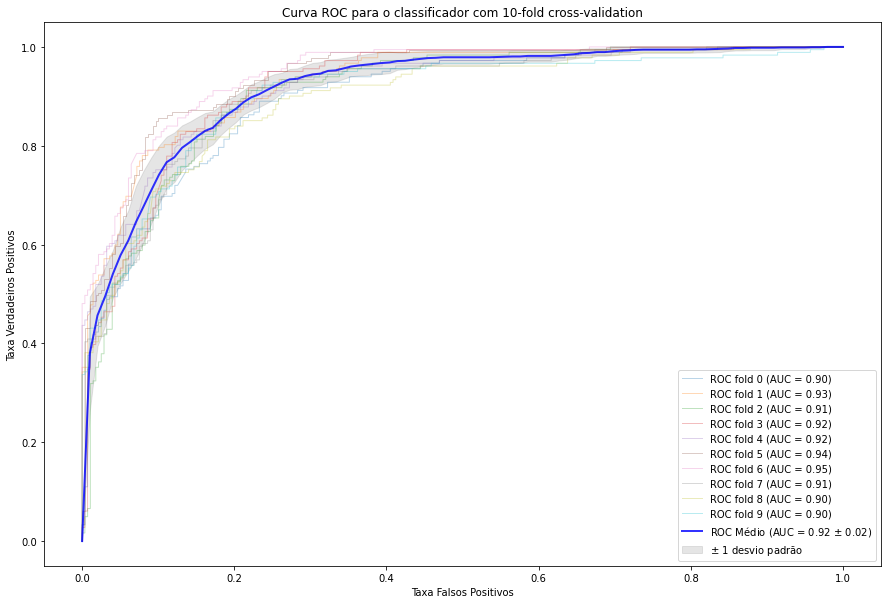

In [ ]:
plot_kfold_roc_curves(melhor_modelo_svm, X, y)